In [ ]:
from matplotlib import pyplot as plt

def draw_directed_segment(dirseg, col):
    pt1 = dirseg [0]
    pt2 = dirseg [1]
    dx = pt2 [0] - pt1 [0]
    dy = pt2 [1] - pt1 [1]
    plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]], '-', color=col)
    plt.quiver(
        pt1[0], pt1[1], dx, dy,
        scale_units='xy', angles='xy', scale=1,
        width=.004,
        color=col
    )

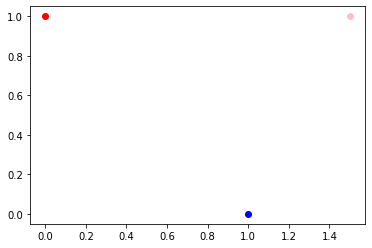

In [ ]:
def draw_point(pt, col):
  plt.plot(pt[0], pt[1], 'o', color=col)

draw_point([0, 1], 'red')
draw_point([1, 0], 'blue')
draw_point([1.5, 1], 'pink')
plt.show()

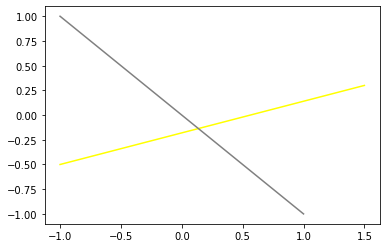

In [ ]:
def draw_segment(seg, col):
  p1 = seg[0]
  p2 = seg[1]
  plt.plot([p1[0], p2[0]], [p1[1], p2[1]], color=col)

draw_segment([[-1,-0.5], [1.5, 0.3]], [1, 1, 0])
draw_segment([[-1, 1], [1, -1]], [0.5, 0.5, 0.5])
plt.show()

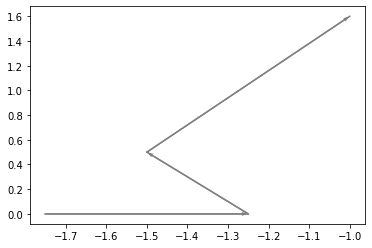

In [ ]:
def draw_path(path, col):
  for i in range(len(path)):
    if i+1 < len(path):
      draw_directed_segment([path[i], path[i+1]], col)

draw_path([[-1.75, 0.0], [-1.25, 0.0], [-1.5, 0.5], [-1.0, 1.6]], 'grey')
plt.show()

<function matplotlib.pyplot.show>

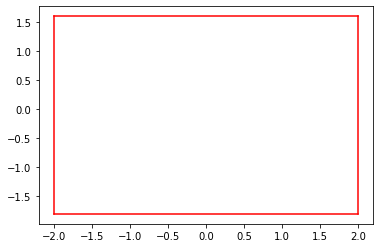

In [ ]:
def draw_window(win, col):
  plt.plot(win[0], [win[1], win[1]], color=col)
  plt.plot([win[0], win[0]], win[1], color=col)

draw_window([[-2, 2], [-1.8, 1.6]], [1,0,0])
plt.show

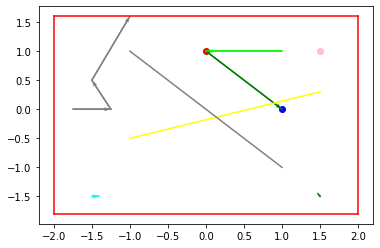

In [ ]:
draw_point([0, 1], 'red')
draw_point([1, 0], 'blue')
draw_point([1.5, 1], 'pink')
draw_directed_segment([[0,1], [1,0]], 'green')
draw_directed_segment([[-1.5,-1.5], [-1.4,-1.5]], 'cyan')
draw_directed_segment([[1.5,-1.5], [1.47,-1.45]], 'green')
draw_directed_segment([[1,1], [0,1]], [0, 1, 0])
draw_path([[-1.75, 0.0], [-1.25, 0.0], [-1.5, 0.5], [-1.0, 1.6]], 'grey')
draw_segment([[-1,-0.5], [1.5, 0.3]], [1, 1, 0])
draw_segment([[-1, 1], [1, -1]], [0.5, 0.5, 0.5])
draw_window([[-2, 2], [-1.8, 1.6]], [1,0,0])
plt.show()

In [ ]:
def lines_intersect(line1, line2):
  d = -(line1[0] * line2[1] - line1[1] * line2[0])
  dx = line1[2] * line2[1] - line1[1] * line2[2]
  dy = line1[0] * line2[2] - line1[2] * line2[0]
  if d != 0:
    x = dx / d
    y = dy / d
    return [x, y]
  else:
    return None

l1 = [1, 1, -3]
l2 = [1, -1, 1]

l3 = [1, 1, 0]
l4 = [2, 2, 3]

print(lines_intersect(l1, l2))
print(lines_intersect(l3, l4))

[1.0, 2.0]
None


In [ ]:
def line_from_segment(seg):
  a = (seg[0][1] - seg[1][1])
  b = (seg[1][0] - seg[0][0])
  c = (seg[0][0]*seg[1][1] - seg[1][0]*seg[0][1])
  return [a, b, c]

l5 = line_from_segment([[0,0], [1,1]])
l6 = line_from_segment([[3,0], [3,2]])
print(l5)
print(l6)

[-1, 1, 0]
[-2, 0, 6]


In [ ]:
def point_on_segment(point, seg):
  diff_p1_x = point[0] - seg[0][0]
  diff_p1_y = point[1] - seg[0][1]
  diff_p2_x = point[0] - seg[1][0]
  diff_p2_y = point[1] - seg[1][1]
  v1 = [diff_p1_x, diff_p1_y]
  v2 = [diff_p2_x, diff_p2_y]
  dot = v1[0]*v2[0] + v1[1]*v2[1]
  if dot > 0:
    return False
  return True

print(point_on_segment([0, -1], [[1,1], [3, 5]]))
print(point_on_segment([2, 3], [[1,1], [3, 5]]))

False
True


In [ ]:
def segments_intersect(seg1, seg2):
  l1 = line_from_segment(seg1)
  l2 = line_from_segment(seg2)
  intersection = lines_intersect(l1, l2)
  if point_on_segment(intersection, seg1):
    return intersection
  return None

s1 = [[0,0], [4,4]]
s2 = [[3,0], [3,10]]

print(segments_intersect(s1, s2))

[3.0, 3.0]


In [ ]:
from math import sin, cos, pi
import numpy as np


def ray_segment_intersect(ray, seg):
  ray_o = np.array(ray[0], dtype=np.float)
  ray_d = np.array((cos(ray[1]), sin(ray[1])))
  p1 = np.array(seg[0], dtype=np.float)
  p2 = np.array(seg[1], dtype=np.float)

  v1 = ray_o - p1
  v2 = p2 - p1
  v3 = np.array([-ray_d[1], ray_d[0]])

  t1 = np.cross(v2, v1) / np.dot(v2, v3)
  t2 = np.dot(v1, v3) / np.dot(v2, v3)

  if t1 > 0.0 and t2 >= 0.0 and t2 <= 1.0:
    intersection = ray_o + t1 * ray_d
    return [round(intersection[0], 5), round(intersection[1], 5)]
  return None

r1 = [[0.5, 0.5], math.pi/2]
s3 = [[0, 0], [1, 2]]

print(ray_segment_intersect(r1, s3))

[0.5, 1.0]


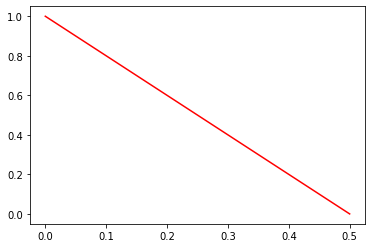

In [ ]:
def boundary_intersect(point, seg):
  array = []
  for x in range(len(point)):
    for y in range(len(seg)):
      if point[x] is not None and point_on_segment(point[x], seg[y]) and point[x] not in array:
        array.append(point[x])
  return array

def draw_line_in_window(line, window, col):
    w1 = [[window[0][0], window[1][0]], [window[0][0], window[1][1]]]
    w2 = [[window[0][0], window[1][0]], [window[0][1], window[1][0]]]
    w3 = [[window[0][1], window[1][1]], [window[0][1], window[1][0]]]
    w4 = [[window[0][1], window[1][1]], [window[0][0], window[1][1]]]
    
    window_l_1 = line_from_segment(w1)
    window_l_2 = line_from_segment(w2)
    window_l_3 = line_from_segment(w3)
    window_l_4 = line_from_segment(w4)
    
    p1 = lines_intersect(line, window_l_1)
    p2 = lines_intersect(line, window_l_2)
    p3 = lines_intersect(line, window_l_3)
    p4 = lines_intersect(line, window_l_4)

    w_array = [w1, w2, w3, w4]
    p_array = [p1, p2, p3, p4]

    boundary = boundary_intersect(p_array, w_array)

    draw_segment(boundary, col)
    
    return boundary



l7 = [2, 1, -1]
l8 = [-1, 1, 0]
w1 = [[0, 2], [0, 2]]
draw_line_in_window(l7, w1, [1, 0, 0])
plt.show()

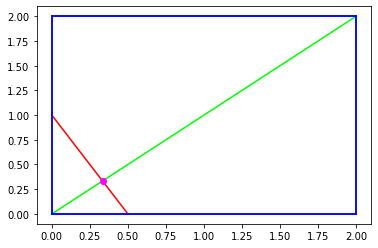

In [ ]:
def draw_lines_and_window(line1, line2, window):
  seg1 = draw_line_in_window(line1, window, [1, 0, 0])
  seg2 = draw_line_in_window(line2, window, [0, 1, 0])
  win = draw_window(window, [0, 0, 1])
  if segments_intersect(seg1, seg2) is not None:
    intersect = draw_point(segments_intersect(seg1, seg2), [1, 0, 1])

draw_lines_and_window(l7, l8, w1)
draw_window(w1, [0, 0, 1])
plt.show()

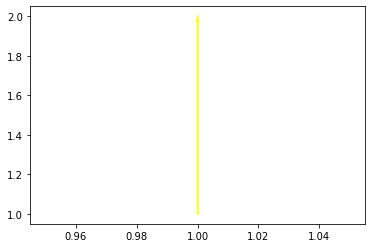

In [ ]:
def draw_ray_in_window(ray, window, col):
  w1 = [[window[0][0], window[1][0]], [window[0][0], window[1][1]]]
  w2 = [[window[0][0], window[1][0]], [window[0][1], window[1][0]]]
  w3 = [[window[0][1], window[1][1]], [window[0][1], window[1][0]]]
  w4 = [[window[0][1], window[1][1]], [window[0][0], window[1][1]]]

  p1 = ray_segment_intersect(ray, w1)
  p2 = ray_segment_intersect(ray, w2)
  p3 = ray_segment_intersect(ray, w3)
  p4 = ray_segment_intersect(ray, w4)

  w_array = [w1, w2, w3, w4]
  p_array = [p1, p2, p3, p4]

  boundary = boundary_intersect(p_array, w_array)

  if len(boundary) == 1:
    draw_directed_segment([ray[0], boundary[0]], col)
    return [ray[0], boundary[0]]
  else:
    draw_directed_segment([boundary[1], boundary[0]], col)
    return boundary[0]


r2 = [[1, 1], math.pi/2]
draw_ray_in_window(r2, w1, [1, 1, 0])
plt.show()

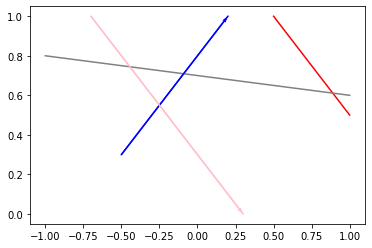

In [ ]:
win = [[-1,1], [0, 1]]
line1 = [1, 1, -1.5]
line2 = [0.1, 1, -0.7]
ray = [[-0.5, 0.3], math.pi/4]
ray2 = [[-1.8, 2.1], -math.pi/4]
draw_line_in_window(line1, win, 'red')
draw_line_in_window(line2, win, 'grey')
draw_ray_in_window(ray, win, 'blue')
draw_ray_in_window(ray2, win, 'pink')
plt.show()


In [ ]:
from math import atan2

def ray_in_window(ray, window):
  w1 = [[window[0][0], window[1][0]], [window[0][0], window[1][1]]]
  w2 = [[window[0][0], window[1][0]], [window[0][1], window[1][0]]]
  w3 = [[window[0][1], window[1][1]], [window[0][1], window[1][0]]]
  w4 = [[window[0][1], window[1][1]], [window[0][0], window[1][1]]]

  p1 = ray_segment_intersect(ray, w1)
  p2 = ray_segment_intersect(ray, w2)
  p3 = ray_segment_intersect(ray, w3)
  p4 = ray_segment_intersect(ray, w4)

  w_array = [w1, w2, w3, w4]
  p_array = [p1, p2, p3, p4]

  boundary = boundary_intersect(p_array, w_array)
  if len(boundary) > 0:
    return boundary[0]
  else:
    return None

def find_angle(vec1, vec2):
  v1 = vec1[1] - vec1[0]
  v2 = vec2[1] - vec2[0]
  v1_norm = v1 / np.linalg.norm(v1)
  v2_norm = v2 / np.linalg.norm(v2)
  dot = np.dot(v1_norm, v2_norm)
  theta = np.arccos(dot)
  return theta

def one_bounce(ray, seg, win):
  intersection = ray_segment_intersect(ray, seg)
  if intersection is not None:

    int_array = np.array(intersection, dtype=np.float)

    a_p = np.array(ray[0], dtype=np.float)
    a = np.array([a_p, int_array], dtype=np.float)
    a_o = np.array([a_p-int_array, int_array-int_array], dtype=np.float)    
    a_theta = math.atan2(a_o[0][1], a_o[0][0])
    
    ob = np.array(seg, dtype=np.float)
    ob_v = ob[1] - ob[0]
    ob_theta = math.atan2(ob_v[1], ob_v[0])

    n = np.array([int_array[0]+cos(math.pi/2+ob_theta), int_array[1]+sin(math.pi/2+ob_theta)], dtype=np.float)
    n_inv = np.array([int_array[0]+cos(math.pi/2+ob_theta)*-1, int_array[1]+sin(math.pi/2+ob_theta)*-1], dtype=np.float)

    n_o = n-int_array
    n_theta = round(math.atan2(n_o[1], n_o[0]), 6)
    n_vec = np.array([int_array, n], dtype=np.float)
    n_vec_inv = np.array([int_array, n_inv], dtype=np.float)

    a_inv = np.array([int_array, a_p], dtype=np.float)

    n_vec_theta = find_angle(n_vec, a_inv)
    n_vec_inv_theta = find_angle(n_vec_inv, a_inv)

    if n_vec_theta < n_vec_inv_theta:
      a_n_theta = n_vec_theta
      n_v = n_vec
    else:
      a_n_theta = n_vec_inv_theta
      n_v = n_vec_inv

    n_v_o = n_v[1]-int_array
    n_v_theta = round(math.atan2(n_v_o[1], n_v_o[0]), 6)

    b_theta_1 = a_theta + 2*a_n_theta
    b_theta_2 = a_theta - 2*a_n_theta

    b_vec_1 = np.array([int_array, [int_array[0]+cos(b_theta_1), int_array[1]+sin(b_theta_1)]], dtype=np.float)
    b_vec_2 = np.array([int_array, [int_array[0]+cos(b_theta_2), int_array[1]+sin(b_theta_2)]], dtype=np.float)

    b_vec_1_theta = find_angle(n_v, b_vec_1)
    b_vec_2_theta = find_angle(n_v, b_vec_2)

    if round(b_vec_1_theta, 3) == round(a_n_theta, 3):
      b_theta = b_theta_1
    else:
      b_theta = b_theta_2

    # print(n_v_theta)
    # print(a_theta)
    # print(a_n_theta)
    # print(b_theta)

    ray2 = ray_in_window([int_array, b_theta], win)

    # draw_directed_segment(a, [0,1,0])
    # draw_directed_segment(n_v, [0,1,1])
    # draw_directed_segment(b_vec_1, [0,0,0])
    # draw_directed_segment(b_vec_2, [0,0,0])
    # draw_segment([seg[0], int_array], [0,0,1])

    return [ray[0], intersection, ray2]
  return None


s4 = [[0,3], [3,0]]
s5 = [[0,0], [3,0]]
s6 = [[-1,0], [-1,4]]
s7 = [[1,0], [1,4]]
s8 = [[3,0], [3,3]]
s9 = [[1,0], [2, 3]]
s10 = [[-1, 4], [4, 4]]

w2 = [[-1, 4], [-1, 4]]
w3 = [[-2, 4], [-2, 4]]
w4 = [[-1, 5], [-1, 5]]

r3 = [[1,1], math.pi/6]
r4 = [[0.75, 2], math.pi+0.1]
r5 = [[1.633975, 1.366025], -2.094394348921328]
r6 = [[0.5, 1], 5*math.pi/3]
r7 = [[2, 2], -0.8*math.pi]
r8 = [[1, 1], math.pi/4]
r9 = [[1, -0.5], 3*math.pi/4]
r10 = [[0.5, -0.5], math.pi/4]
r11 = [[1.5, -0.5], math.pi/4]
r12 = [[2, 0.0], 2.094394607451659]
r13 = [[1, 1], 7*math.pi/4]
r14 = [[2, 1], 11*math.pi/6]
r15 = [[-1.0, 3.196159], 1.0471980812915187]
r16 = [[1.07735, 0.0], math.pi/3]

print(one_bounce(r3, s4, w2))
#print(one_bounce(r4, s4, w2))
#print(one_bounce(r5, s5, w2))
#print(one_bounce(r6, s5, w2))
#print(one_bounce(r7, s4, w2))
#print(one_bounce(r9, s5, w2))
#print(one_bounce(r5, s5, w2))
#print(one_bounce(r6, s5, w2))
#print(one_bounce(r9, s5, w2))
#print(one_bounce(r10, s5, w2))
#print(one_bounce(r11, s5, w2))
#print(one_bounce(r10, s8, w3))
#print(one_bounce(r14, s8, w3))
#print(one_bounce(r12, s9, w3))
#print(one_bounce(r13, s9, w3))
#print(one_bounce(r15, s10, w4))
#print(one_bounce(r16, s4, w2))




[[1, 1], [1.63397, 1.36603], [0.26791, -1.0]]


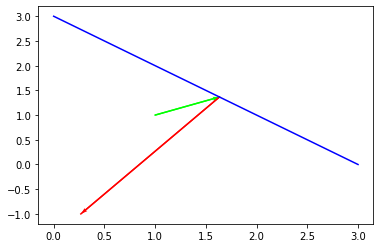

In [ ]:
def draw_one_bounce(path, seg, win):
  ray1 = draw_directed_segment([path[0], path[1]], [0, 1, 0])
  ray2 = draw_directed_segment([path[1], path[2]], [1, 0, 0])
  obstacle = draw_segment(seg, [0, 0, 1])


path_1 = one_bounce(r3, s4, w2)
#path_2 = one_bounce(r5, s5, w2)
#path_3 = one_bounce(r6, s5, w2)
#path_4 = one_bounce(r7, s4, w2)
#path_5 = one_bounce(r8, s4, w2)
#path_6 = one_bounce(r9, s5, w2)
#path_7 = one_bounce(r10, s5, w2)
#path_8 = one_bounce(r11, s5, w2)
#path_9 = one_bounce(r12, s9, w3)

draw_one_bounce(path_1, s4, w2)

plt.show()

In [ ]:
def one_bounce_dir(ray, seg, win):
  intersection = ray_segment_intersect(ray, seg)
  if intersection is not None:
    
    int_array = np.array(intersection, dtype=np.float)

    a_p = np.array(ray[0], dtype=np.float)
    a = np.array([a_p, int_array], dtype=np.float)
    a_o = np.array([a_p-int_array, int_array-int_array], dtype=np.float)    
    a_theta = math.atan2(a_o[0][1], a_o[0][0])
    
    ob = np.array(seg, dtype=np.float)
    ob_v = ob[1] - ob[0]
    ob_theta = math.atan2(ob_v[1], ob_v[0])

    n = np.array([int_array[0]+cos(math.pi/2+ob_theta), int_array[1]+sin(math.pi/2+ob_theta)], dtype=np.float)
    n_inv = np.array([int_array[0]+cos(math.pi/2+ob_theta)*-1, int_array[1]+sin(math.pi/2+ob_theta)*-1], dtype=np.float)

    n_o = n-int_array
    n_theta = round(math.atan2(n_o[1], n_o[0]), 6)
    n_vec = np.array([int_array, n], dtype=np.float)
    n_vec_inv = np.array([int_array, n_inv], dtype=np.float)

    a_inv = np.array([int_array, a_p], dtype=np.float)

    n_vec_theta = find_angle(n_vec, a_inv)
    n_vec_inv_theta = find_angle(n_vec_inv, a_inv)

    if n_vec_theta < n_vec_inv_theta:
      a_n_theta = n_vec_theta
      n_v = n_vec
    else:
      a_n_theta = n_vec_inv_theta
      n_v = n_vec_inv

    n_v_o = n_v[1]-int_array
    n_v_theta = round(math.atan2(n_v_o[1], n_v_o[0]), 6)

    b_theta_1 = a_theta + 2*a_n_theta
    b_theta_2 = a_theta - 2*a_n_theta

    b_vec_1 = np.array([int_array, [int_array[0]+cos(b_theta_1), int_array[1]+sin(b_theta_1)]], dtype=np.float)
    b_vec_2 = np.array([int_array, [int_array[0]+cos(b_theta_2), int_array[1]+sin(b_theta_2)]], dtype=np.float)

    b_vec_1_theta = find_angle(n_v, b_vec_1)
    b_vec_2_theta = find_angle(n_v, b_vec_2)

    if round(b_vec_1_theta, 3) == round(a_n_theta, 3):
      b_theta = b_theta_1
    else:
      b_theta = b_theta_2

    ray2 = ray_in_window([int_array, b_theta], win)

    return [ray[0], intersection, ray2, b_theta]
  return None


def multi_bounce(ray, seglist, win, maxpathlen):
  i = 0
  bounces = []

  while i < maxpathlen:
    if len(bounces) == 0:
      k = 0
      bounce_cache = []
      while k < len(seglist):
        bounce = one_bounce_dir(ray, seglist[k], win)
        if bounce is not None:
          bounce_cache.append(bounce)
        k += 1
      if len(bounce_cache) > 0:
        intersections = []
        for x in bounce_cache:
          distance = np.linalg.norm(np.array(ray[0], dtype=np.float) - np.array(x[1], dtype=np.float))
          intersections.append(distance)
        closest = intersections.index(min(intersections))
        bounces.append(bounce_cache[closest])
    else:
      k = 0
      bounce_cache = []
      ray_k = [bounces[-1][1], bounces[-1][3]]
      while k < len(seglist):
        bounce = one_bounce_dir(ray_k, seglist[k], win)
        if bounce is not None:
          bounce_cache.append(bounce)
        k += 1
      if len(bounce_cache) > 0:
        intersections = []
        for x in bounce_cache:
          distance = np.linalg.norm(np.array(ray_k[0], dtype=np.float) - np.array(x[1], dtype=np.float))
          intersections.append(distance)
        closest = intersections.index(min(intersections))
        bounces.append(bounce_cache[closest])
    i += 1

  path = []
  if len(bounces) == 0:
    path = bounces
  elif len(bounces) == 1:
    path = bounces[0][:-1]
  else:
    path = [bounces[0][0], bounces[0][1]]
    for x in bounces[1:]:
      if x in bounces:
        path.append(x[1])
        path.append(bounces[-1][2])
        break
      path.append(x[1])

  return path
  
w3 = [[-1, 4], [-1, 4]]
slst_1 = [[[0,3], [3,0]], [[0,0], [3,0]]]
r5 = [[1,1], math.pi/6]

r11 = [[1.5, -0.5], math.pi/4]

print(multi_bounce(r3, slst_1, w3, 5))


[[1, 1], [1.63397, 1.36603], [0.84528, 0.0], [-1.0, 3.19607]]


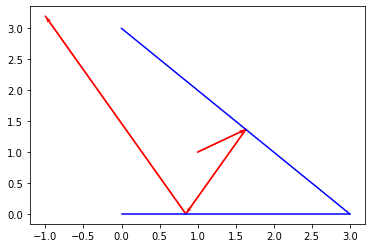

In [ ]:
def draw_multi_bounce(path, seglist, win):
  path = draw_path(path, [1, 0, 0])
  for x in seglist:
    ob = draw_segment(x, [0, 0, 1])

bounce_path_1 = multi_bounce(r3, slst_1, w2, 5)

draw_multi_bounce(bounce_path_1, slst_1, w2)
plt.show()

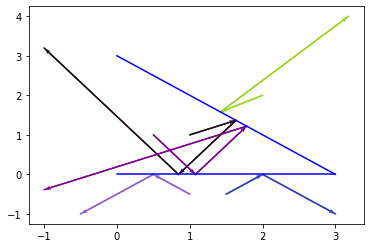

In [ ]:
import random

def draw_n_multi_bounce(pathlist, seglist, win):
  for x in pathlist:
    path_x = draw_path(x, [random.random(), random.random(), random.random()])
  for y in seglist:
    ob = draw_segment(y, [0, 0, 1])

w4 = [[-1, 4], [-1, 4]]
slst_2 = [[[0,3], [3,0]], [[0,0], [3,0]]]
r7 = [[1,1], math.pi/6]
r8 = [[0.5, 1], -math.pi/3]
r9 = [[2, 2], -0.8*math.pi]
r10 = [[1, -0.5], 3*math.pi/4]
r11 = [[1.5, -0.5], math.pi/4]

path_3 = multi_bounce(r7, slst_2, w4, 5)
path_4 = multi_bounce(r8, slst_2, w4, 5)
path_5 = multi_bounce(r9, slst_2, w4, 5)
path_6 = multi_bounce(r10, slst_2, w4, 5)
path_7 = multi_bounce(r11, slst_2, w4, 5)


p_lst_1 = [path_3, path_4, path_5, path_6, path_7]

draw_n_multi_bounce(p_lst_1, slst_2, w4)


[[1, 1], [1.63397, 1.36603], [0.84528, 0.0], [-1.0, 3.19607], [-0.53584, 4.0], [2.35098, -1.0], [2.95457, 0.04543]]


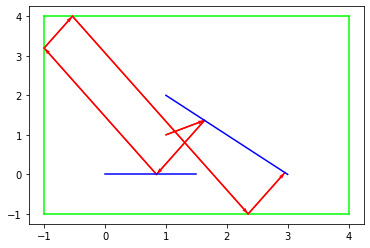

In [ ]:
def multi_bounce_reflect(ray, seglist, win, maxpathlen):
  i = 0
  bounces = []

  w1 = [[win[0][0], win[1][0]], [win[0][0], win[1][1]]]
  w2 = [[win[0][0], win[1][0]], [win[0][1], win[1][0]]]
  w3 = [[win[0][1], win[1][1]], [win[0][1], win[1][0]]]
  w4 = [[win[0][1], win[1][1]], [win[0][0], win[1][1]]]

  draw_segment(w1, [0,1,0])
  draw_segment(w2, [0,1,0])
  draw_segment(w3, [0,1,0])
  draw_segment(w4, [0,1,0])

  win_segs = [w1, w2, w3, w4]

  window = [[win[0][0], win[1][0]], [win[0][0], win[1][1]], [win[0][1], win[1][1]], [win[0][1], win[1][0]]]

  obstacles = seglist + win_segs

  while i < maxpathlen:
    if len(bounces) == 0:
      k = 0
      bounce_cache = []
      while k < len(obstacles):
        bounce = one_bounce_dir(ray, obstacles[k], win)
        if bounce is not None:
          bounce_cache.append(bounce)
        k += 1
      if len(bounce_cache) > 0:
        intersections = []
        for x in bounce_cache:
          distance = np.linalg.norm(np.array(ray[0], dtype=np.float) - np.array(x[1], dtype=np.float))
          intersections.append(distance)
        closest = intersections.index(min(intersections))
        bounces.append(bounce_cache[closest])
    else:
      k = 0
      bounce_cache = []
      ray_k = [bounces[-1][1], bounces[-1][3]]
      while k < len(obstacles):
        bounce = one_bounce_dir(ray_k, obstacles[k], win)
        if bounce is not None:
          bounce_cache.append(bounce)
        k += 1
      if len(bounce_cache) > 0:
        intersections = []
        for x in bounce_cache:
          distance = np.linalg.norm(np.array(ray_k[0], dtype=np.float) - np.array(x[1], dtype=np.float))
          intersections.append(distance)
        closest = intersections.index(min(intersections))
        bounces.append(bounce_cache[closest])
    i += 1

  path = []
  if len(bounces) == 0:
    path = bounces
  elif len(bounces) == 1:
    path = bounces[0][:-1]
  else:
    path = [bounces[0][0], bounces[0][1]]
    for x in bounces[1:]:
      path.append(x[1])

  for x in path:
    for y in window:
      if x == y:
        path = path[:path.index(x)+1]

  return path

w4 = [[-1, 4], [-1, 4]]
slst_4 = [[[1,2], [3,0]], [[0,0], [1.5,0]]]
r12 = [[1,1], math.pi/6]
r13 = [[0,3], 3*math.pi/4]

bounce_path_2 = multi_bounce_reflect(r12, slst_4, w4, 6)
#bounce_path_3 = multi_bounce_reflect(r13, slst_4, w4, 6)

print(bounce_path_2)
#print(bounce_path_3)

draw_multi_bounce(bounce_path_2, slst_4, w4)

plt.show()